In [1]:
import os
os.chdir('..')

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from functions import gaussian, euclidean_distance, gaussian_second_derivative
from network import Network

## KOH1
Maria Kedzierska 305704


# 1. Hexagon dataset

In [3]:
hexagon_data = pd.read_csv('data\\hexagon.csv')
x = np.array(hexagon_data.x)
y = np.array(hexagon_data.y)
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))
hex_xy = np.concatenate((x, y), axis=1)
c = np.array(hexagon_data.c)
c = np.reshape(c, (-1, 1))

In [4]:
hex_data = np.concatenate((hex_xy, c), axis=1)

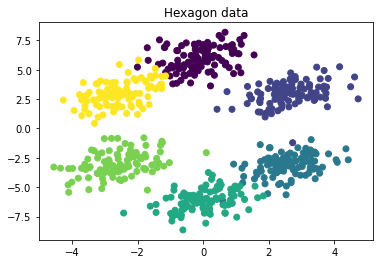

In [5]:
# COLORS = ['yellow', 'orange', 'red', 'purple', 'blue', 'green']
# # colors = [COLORS[idx] for idx in c]
plt.scatter(x, y, c=c)
plt.title('Hexagon data')
plt.show()

In [6]:
def assign_data_to_clusters(centers, data):
    data_clusters = []
    for row in data:
        distances = np.array([euclidean_distance(row, center) for center in centers])
        data_clusters.append(np.argmin(distances))
    return data_clusters

In [7]:
def compare_network_with_ground_truth(network, data):    
    network.plot(data)
    plt.figure(figsize=(4, 2))
    
    plt.scatter(x=data[:, 0], y=data[:, 1], c=data[:, 2])
    plt.title('Prawdziwy podział na klastry')

## 1.1. Porównanie funkcji sąsiedztwa

### 1.1.1. Funkcja Gaussa

Epoch no. 1


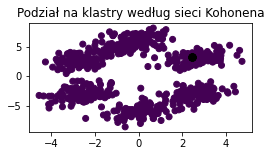

Epoch no. 3


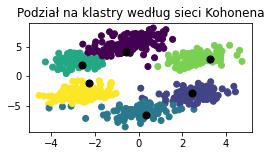

Epoch no. 5


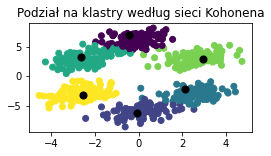

Epoch no. 7


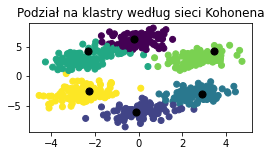

In [8]:
KN_hex = Network(input_shape=2, shape=(2, 3))
KN_hex.fit(hex_data, 9, neighbourhood_scale=1)

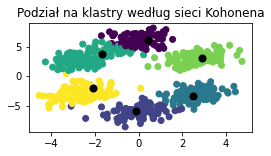

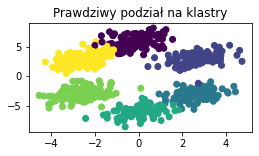

In [9]:
compare_network_with_ground_truth(KN_hex, hex_data)

Epoch no. 1


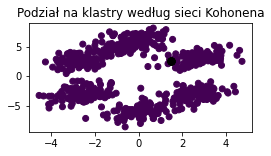

Epoch no. 3


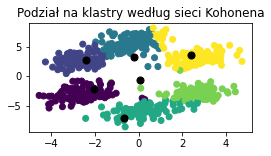

Epoch no. 5


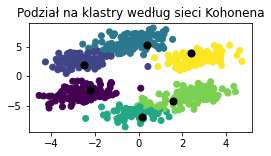

Epoch no. 7


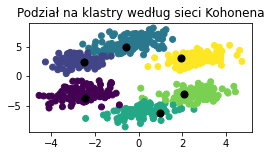

Epoch no. 9


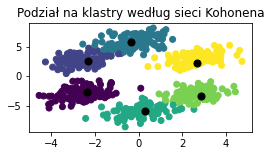

Epoch no. 11


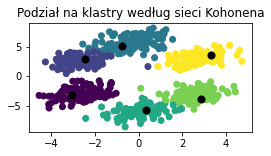

Epoch no. 13


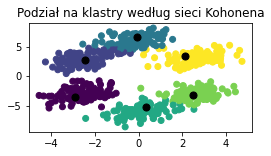

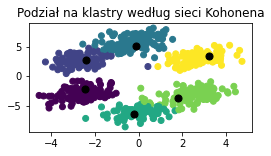

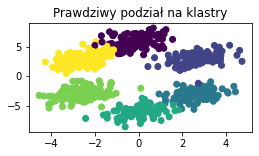

In [15]:
KN_hex2 = Network(input_shape=2, shape=(2, 3))
KN_hex2.fit(hex_data, 15, neighbourhood_scale=0.5)
compare_network_with_ground_truth(KN_hex2, hex_data)

#### Inny wymiar sieci

Epoch no. 1


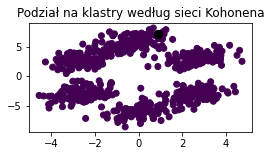

Epoch no. 3


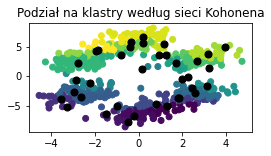

Epoch no. 5


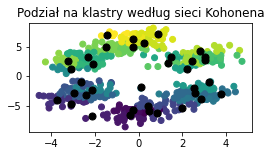

Epoch no. 7


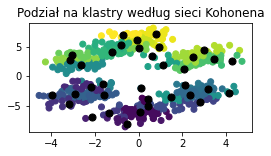

Epoch no. 9


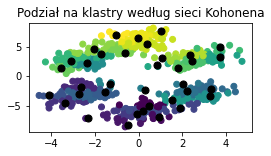

Epoch no. 11


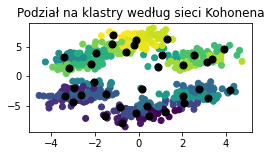

Epoch no. 13


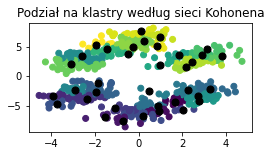

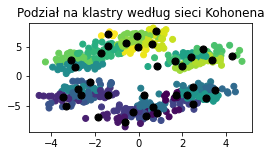

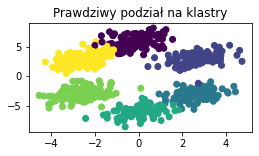

In [16]:
KN_hex3 = Network(input_shape=2, shape=(10, 10))
KN_hex3.fit(hex_data, 15, neighbourhood_scale=0.5, visualise=False)


In [19]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(np.reshape(KN_hex3.weights, (-1, 2)))

In [22]:
KMeans(n_clusters=6, np.reshape(KN_hex3.weights, (-1, 2)))

SyntaxError: positional argument follows keyword argument (622394551.py, line 1)

### 1.1.2. Funkcja meksykański kapelusz

Epoch no. 1


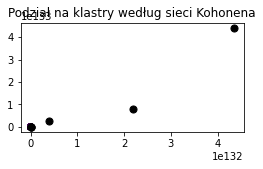

C:\Users\marys\PycharmProjects\KOH\venv\lib\site-packages\numpy\linalg\linalg.py:2546: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
C:\Users\marys\PycharmProjects\KOH\network.py:88: RuntimeWarning: overflow encountered in add
  self.weights[i, j, :] += delta_weights


Epoch no. 3


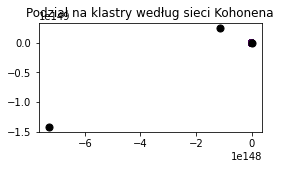

C:\Users\marys\PycharmProjects\KOH\venv\lib\site-packages\numpy\linalg\linalg.py:2547: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))


Epoch no. 5


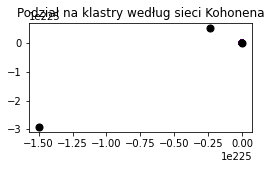

Epoch no. 7


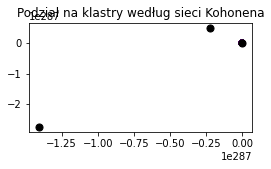

In [10]:
KN_hex_m = Network(input_shape=2, shape=(2, 3), neighbourhood_func=gaussian_second_derivative)
KN_hex_m.fit(hex_data, 9, neighbourhood_scale=1)

In [11]:
colors = assign_data_to_clusters(KN_hex.weights.reshape(6, 2), hex_xy)

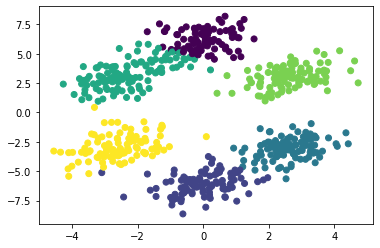

In [12]:
plt.scatter(x, y, c=colors)

In [13]:
dist_arr = np.reshape(dist, (600, 1))

NameError: name 'dist' is not defined

In [ ]:
dist_arr.shape